## Importing the Necessary Libraries

In [8]:
import qiskit
import matplotlib.pyplot as plt
from qiskit import BasicAer
import numpy as np

## basic Machine Learning Package from qiskit
from qiskit.ml.datasets import ad_hoc_data
from qiskit.aqua import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

### Seting up the parameters

In [17]:
feature_dim = 2
training_dataset_size = 200
testing_dataset_size  = 100
random_seed = 17135
shots =10000

### Plotting the Ad_Hoc Data 

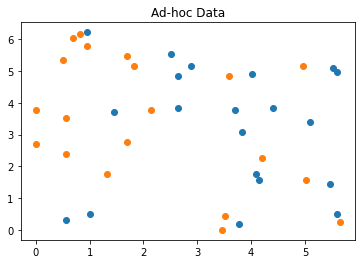

In [11]:
sample_Total, training_input, test_input, class_labels = ad_hoc_data(training_size = training_dataset_size,
                                                                     test_size = testing_dataset_size,
                                                                     gap = 0.3,
                                                                     n = feature_dim,
                                                                     plot_data=True)


### Deteremining the Class where they Belong

In [12]:
datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

{'A': 0, 'B': 1}


### Making a backend for the Programm to run

In [13]:
backend = BasicAer.get_backend('qasm_simulator')
feature_map = ZZFeatureMap(feature_dim, reps =2)
svm = QSVM(feature_map, training_input, test_input, None)
svm.random_seed = random_seed
quantum_instance = QuantumInstance(backend,
                                   shots= shots,
                                   seed_simulator= random_seed,
                                   seed_transpiler= random_seed)
result = svm.run(quantum_instance)
           

###  Plotting the Kernel Matrix

Kernel Matrix during The Training


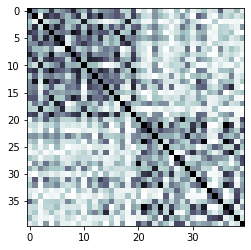

In [15]:
print("Kernel Matrix during The Training")
kernel_matrix = result["kernel_matrix_training"]
img = plt.imshow(np.asmatrix(kernel_matrix), interpolation='nearest', origin='upper', cmap='bone_r')
plt.show()

### Checking the Efficiency of the Model

In [16]:
predicted_labels = svm.predict(datapoints[0])
predicted_classes = map_label_to_class_name(predicted_labels, svm.label_to_class)
print("ground truth : {}".format(datapoints[1]))
print("prediction: {}".format(predicted_labels))
print("testing success ratio : ", result['testing_accuracy'])

ground truth : [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
prediction: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
testing success ratio :  1.0
